# Overview of Week 3

This week's assignment consists of two parts. The first part gives you an introduction to unsupervised learning. In particular, we focus on techniques for clustering and dimensionality reduction and how they can be applied to ecommerce data. As you work through the three clustering case studies, you will find yourself generating many intermediate datasets, trying different models, and tuning each model as you go along. There's a lot to keep track of.   

This is where Part 2 comes in. It is in Part 2 that we introduce ideas of **workflow management** and **computational reproducibility**. Workflow management means organising your project directory to manage your analysis' artefacts (visualisations, processed datasets, notebooks and utility functions and experiment results). Ideally, your code for these should be clearly commented with well chosen names. Computational reproducibility means someone else (including future you!) being able to take just the code and data, and reproduce your project, from its results and models to visualisations etc. How one decides to practice workflow management and computational reproducibility can be quite a personal decision. Therefore, we provide guidelines, not rules. The most important is having a system rather than no system at all. 

**note about the week**   
While week 1's assignment was guided, with specific instructions about what code to run, as we move on the assignments will involve less hand-holding. For this week, we include some instructions, but leave the specific implementations up to you. There are also many techniques we cover. Again, while we share some resources, we leave the bulk of the research and background reading up to you to manage for yourself. As a record of how well you have synthesised your readings, this notebook has space for writing a few paragraphs of explanations. We hope you won't be content with a shallow explanation, and that you use this space to apply the [Feynmann technique](https://collegeinfogeek.com/feynman-technique/) as a check of understanding. 

To tie Part 1 and Part 2 of the week together, we are not just asking for one Jupyter Notebook as a final deliverable. Instead, there are four deliverables to the week: 

**1. Part 1 Notebook I and II exercises presented at the end of the week job-interview style**

**2. A script that automates the data cleaning and feature engineering steps you take so your findings are reproducible (see Part 2 Notebook I for more info)**

**3. A repo README.md (see Part 2 Notebook I for more info)**

**4  A record of software package versions and software environment used (see Part 2 Notebook I for more info)**   

**recap of the objectives for the first 6 weeks:**  
We aim to broadly cover a wide range of Machine Learning algorithms so that you can: 
- handle the technical demands of a 100E given some guidance on the right direction to take 
- can handle a technical job interview and get hired 

*materials for unsupervised learning adapted from William Thji* 

# Part I : Unsupervised Learning 
Unsupervised Learning refers to a set of machine learning techniques where no output variables (Y) are given. Only the input variables (X) are available and our job is to find patterns in X. You may read more about it from *pg 485 from Hastie and Tibshirani's Elements of Statistical Learning* available [here](https://web.stanford.edu/~hastie/Papers/ESLII.pdf). 

ESL by Hastie et. al with be the primary reference for this week, although feel free to source for your own books and links. 

## Short introduction to clustering 
Clustering puts datapoints into subsets so that datapoints within a cluster are more closely related to one another compared to datapoints in another cluster. More information is available from page 501 of *Elements of Statistical Learning*. 

Some quick points: 
- Clustering is extremely useful to many fields: 
    - Customer segmentation for personalised product recommendations
    - Topic identification to relieve the need to manually vet documents 
    - Image or geo-spatial segmentation to optimised supply and demand (Gojek does this) 
    - and maybe most importantly, getting a sense of the data before starting to model it. 

- Some examples of clustering algorithms: 
    - KMeans
    - Gaussian Mixture Models for drawing soft clustering boundaries instead of hard ones 
    - Hierarchical clustering
    - DBScan for density-based clustering for anomaly detection 
    - Co-clustering
    - Biclustering for analysing genes

## Deliverable 1: Complete the Clustering Case Study: Using PCA and clustering to uncover customer segments 
Context: The dataset we will be working with contains ecommerce transactions from a UK-based online retails store. The dataset is available on [Kaggle](https://www.kaggle.com/carrie1/ecommerce-data/home) or the UCI Machine Learning Repository. The dataset is quite small, so we have also included it inside the `data` folder inside this repo as `data/raw/data.csv`. 

From the Kaggle website: 

"This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

### Case Study Goal 
Cluster the dataset into meaningful customer segments. This means creating clusters that are statistically robust and that make business sense. 


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_raw = pd.read_csv('data/raw/data.csv', encoding='ISO-8859-1')
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Cleaning data 

Some data types are muddled, there are duplicates, NA values and unreasonable values hiding in the columns 

1. Clean the dataset. You may want to list the steps taken to clean the data and encapsulate the steps inside their own functions so they can be reused. Organise the functions into their own library

<font color='blue'>Deal with negative prices, negative quantities (which are returns maybe)  
Invoice Number: Drop those that start with A, contra against those starting with C.</font>

In [3]:
print(df_raw.info())
print(df_raw.describe())
print(df_raw.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
InvoiceNo           0
StockCode           0
Description   

In [4]:
def remove_accounting(df):
    print('accounting entries',len(df[df['InvoiceNo'].str.contains('^[A]')]))
    return df[~df['InvoiceNo'].str.contains('^[A]')]

def remove_inventory_management(df):
    # Items with a negative quantity and InvoiceNo not starting with C are removed
    print('inventory adjustment items removed:',len(df_raw[((df_raw['Quantity']<0) & (df_raw['InvoiceNo'].str.contains('^(?!C)')))]))
    return df[~((df['Quantity']<0) & (df['InvoiceNo'].str.contains('^(?!C)')))]

def remove_neg_price(df):
    print('Price at or below 0 removed: ',len(df[df['UnitPrice']<=0]))
    return df[df['UnitPrice']>0]

def remove_ghost_cust(df):
    print('Customers with no ID: ',np.sum(df['CustomerID'].isnull()))
    df.dropna(axis=0,subset=['CustomerID'],inplace=True)
    return df

def remove_neg_quantities(df):
    print('Quantities at or below 0 removed: ',len(df[df['Quantity']<=0]))
    return df[df['Quantity']>0]

def remove_dupe(df):
    print('Duplicates',len(df[df.duplicated(keep='first')]))
    return df.drop_duplicates()

def clean_data(df): # This function calls all the clearning steps
    print('initial len',len(df))
    df = remove_accounting(df)
    df = remove_inventory_management(df)
    df = remove_neg_price(df)
    df = remove_ghost_cust(df)
    df = remove_neg_quantities(df)
    df = remove_dupe(df)
    df.reset_index(inplace=True,drop=True)
    print('final len',len(df))
    return df

df_clean = clean_data(df_raw)

initial len 541909
accounting entries 3
inventory adjustment items removed: 1336
Price at or below 0 removed:  1179
Customers with no ID:  132602
Quantities at or below 0 removed:  8905
Duplicates 5192
final len 392692


In [5]:
# df_clean[df_clean['Quantity']<0]
# df_clean[(df_clean['StockCode']=='22556')&(abs(df_clean['CustomerID']-17548)<0.01)]
# df_clean[df_clean['CustomerID']==12476]

In [6]:
# print(sum(df_raw['Quantity']<0))
# print(sum(df_raw[df_raw['Quantity']<0]['InvoiceNo'].str.contains('^[C]')))
# print(sum(df_raw[df_raw['Quantity']<0]['InvoiceNo'].str.contains('^(?!C)')))
# df_raw[~((df_raw['Quantity']<0) & (df_raw['InvoiceNo'].str.contains('^(?!C)')))]


### Feature Engineering iteration #1 

Inside the dataset, each row contains information about an ecommerce transation. However, we want to cluster the data by customers, which means each row should instead contain information about a customer. 

1. Reshape the data to follow the format below: 
![alt text](customer.png)

The dataframe should have these columns: `['NoOfInvoices', 'NoOfUniqueItems', 'QuantityPerInvoice', 'TotalQuantity', 'UniqueItemsPerInvoice','UnitPriceMean','UnitPriceStd']` 
2. Save this dataset as an intermediate dataset 

In [25]:
df_new.head(5)

,NoOfInvoices,NoOfUniqueItems,QuantityPerInvoice,TotalQuantity,UniqueItemsPerInvoice,UnitPriceMean,UnitPriceStd
CustomerID,,,,,,,
12346,1,1,74215.000000,74215,1.000000,1.040000,0.000000
12347,7,103,351.142857,2458,14.714286,2.644011,2.255381
12348,4,22,585.250000,2341,5.500000,5.764839,13.400323
12349,1,73,631.000000,631,73.000000,8.289041,35.028021
12350,1,17,197.000000,197,17.000000,3.841176,9.334751


In [7]:
df_clean.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
## your code here 
def engineer_features1(df):
    grouped = df.groupby('CustomerID')
    NoOfInvoices = grouped['InvoiceNo'].nunique()
    NoOfUniqueItems = grouped['StockCode'].nunique()
    QuantityPerInvoice = grouped['Quantity'].sum()/NoOfInvoices
    TotalQuantity = grouped['Quantity'].sum()
    UniqueItemsPerInvoice = NoOfUniqueItems/NoOfInvoices
    UnitPriceMean = grouped['UnitPrice'].mean()
    UnitPriceStd = grouped['UnitPrice'].std()
    UnitPriceStd.fillna(0,inplace=True)
    df_new = pd.DataFrame({'NoOfInvoices':NoOfInvoices,'NoOfUniqueItems':NoOfUniqueItems,'QuantityPerInvoice':QuantityPerInvoice,\
                          'TotalQuantity':TotalQuantity,'UniqueItemsPerInvoice':UniqueItemsPerInvoice,\
                           'UnitPriceMean':UnitPriceMean,'UnitPriceStd':UnitPriceStd})
    df_new.index = df_new.index.astype(int)
    return df_new

df_new = engineer_features1(df_clean)
df_new.to_pickle('./data/engineered_df.pkl')

### Hierarchical clustering iteration #1 [reference pg 520](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

1. Implement any more preprocessing or visualisation steps you feel are necessary to understand how you might build meaningful clusters from the data. 
2. Apply hierarchical clustering to the dataset. 
2. Experiment with different linkage algorithms. Visualise the resulting trees for average linkage, complete linkage and single linkage side-by-side. Which linkage algorithm works best? 
3. List two ways to improve the clustering and implement at least one. Track the results of the first iteration and second iteration (whether with Excel, TextEdit or within this notebook itself). 
4. Describe the clusters you selected and evaluate whether or not they form meaningful segments. 

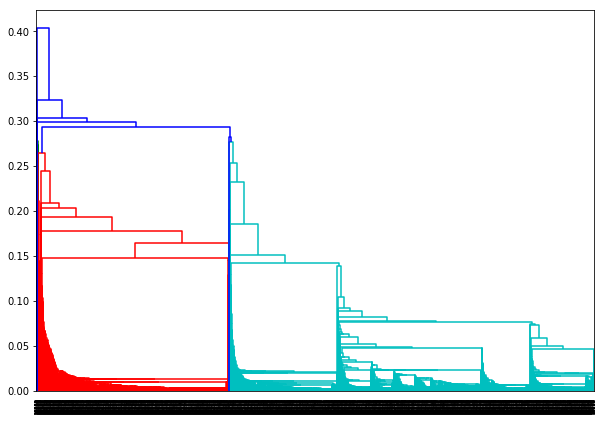

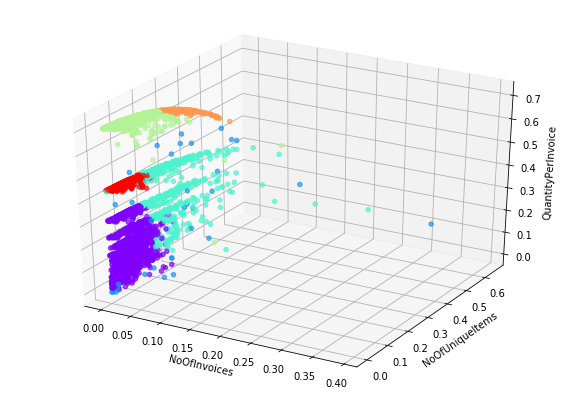

In [50]:
%matplotlib qt
# %matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import axes3d
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
df_clus = pd.read_pickle('./data/engineered_df.pkl')


features = ['QuantityPerInvoice','UniqueItemsPerInvoice']
features = df_clus.columns
labelList = df_clus.index
X = df_clus[features]
# X = StandardScaler().fit_transform(X)
X = normalize(X)

def make_figure(X,labels,axii=[0,1,2],rotate=False):
    fig = plt.figure(figsize=(10, 7))  
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,axii[0]], X[:,axii[1]], X[:,axii[2]], c=labels, cmap='rainbow',alpha=0.7)
    ax.set_xlabel(features[axii[0]])
    ax.set_ylabel(features[axii[1]])
    ax.set_zlabel(features[axii[2]])
    if rotate:
    # rotate the axes and update
        for angle in range(0, 360):
            ax.view_init(30, angle)
            plt.draw()
            plt.pause(.001)

def make_dendogram(X):
    linked = linkage(X, 'single')
    plt.figure(figsize=(10, 7))  
    dendrogram(linked,  
                orientation='top',
                labels=labelList,
                distance_sort='descending',
                show_leaf_counts=True)
    plt.show()  
    
def make_clustering(X,nclusters):
    cluster = AgglomerativeClustering(n_clusters=nclusters, affinity='euclidean', linkage='ward')  
    cluster.fit_predict(X) 
    make_figure(X,cluster.labels_)
    
    return cluster

    
make_dendogram(X)
cluster = make_clustering(X,6)

In [35]:
np.shape(cluster.children_)

(4337, 2)

### K-means and GMM Clustering iteration #1 [reference pg 509](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)
Apart from hierarchical clustering, we can also apply KMeans and Gaussian Mixture Models (GMM) on the data

1. Implement K-means clustering on the data, experimenting with different values of k 
2. Implement a Gaussian Mixture Model on the data, experimenting with different values for the number of components.  
3. Visualise how well K-means and GMMs succeed at separating subgroups in the data
4. List two ways to improve the clustering and implement at least one. 
5. Describe the clusters and evaluate whether or not they form meaningful segments. 

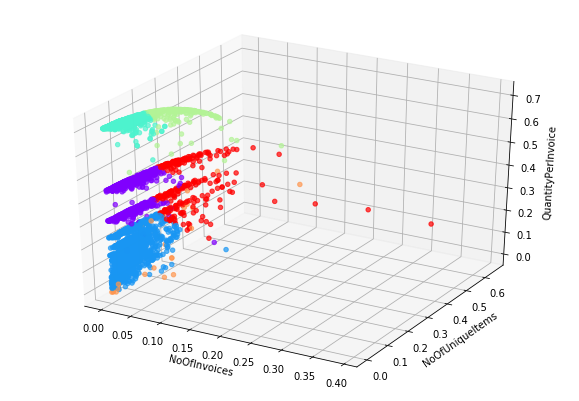

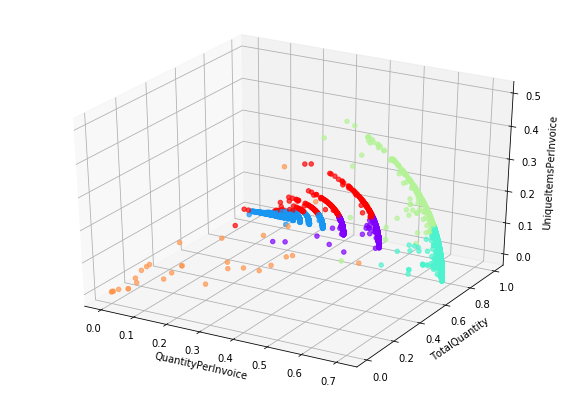

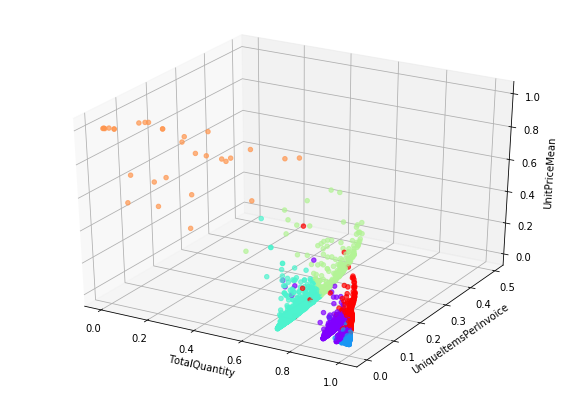

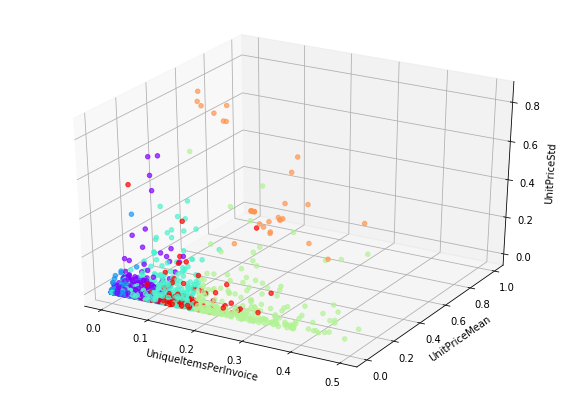

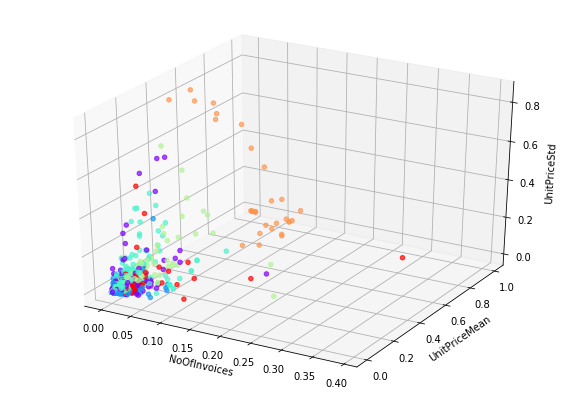

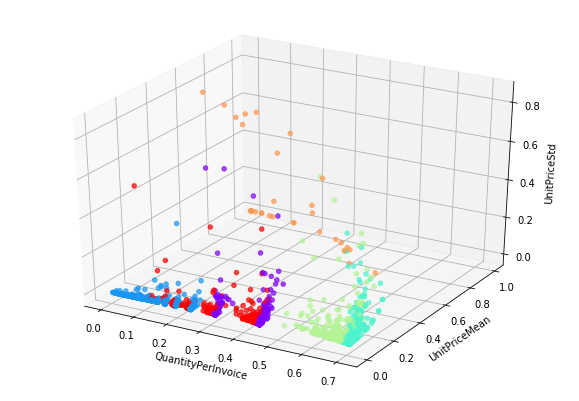

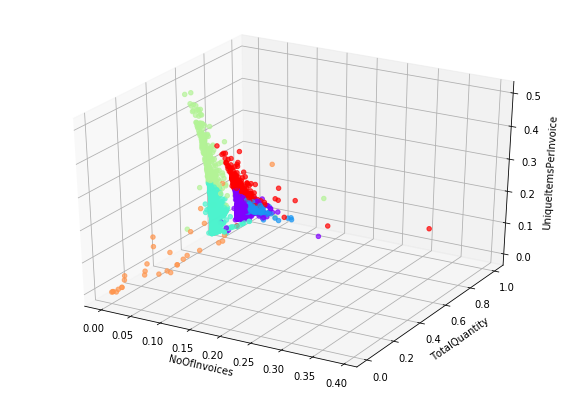

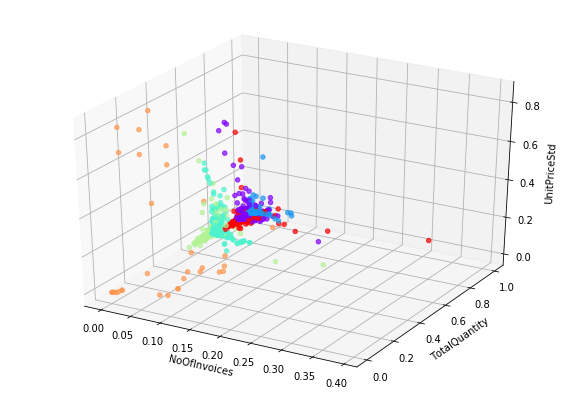

In [54]:
from sklearn.cluster import KMeans

    
def do_kmeans(X):
    kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, \
       tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, \
                    copy_x=True, n_jobs=None, algorithm='auto')
    kmeans.fit_predict(X)
    make_figure(X,kmeans.labels_,axii=[0,1,2])
    make_figure(X,kmeans.labels_,axii=[2,3,4])
    make_figure(X,kmeans.labels_,axii=[3,4,5])
    make_figure(X,kmeans.labels_,axii=[4,5,6])
    make_figure(X,kmeans.labels_,axii=[0,5,6])
    make_figure(X,kmeans.labels_,axii=[2,5,6])
    make_figure(X,kmeans.labels_,axii=[0,3,4])
    make_figure(X,kmeans.labels_,axii=[0,3,6])
    
do_kmeans(X)

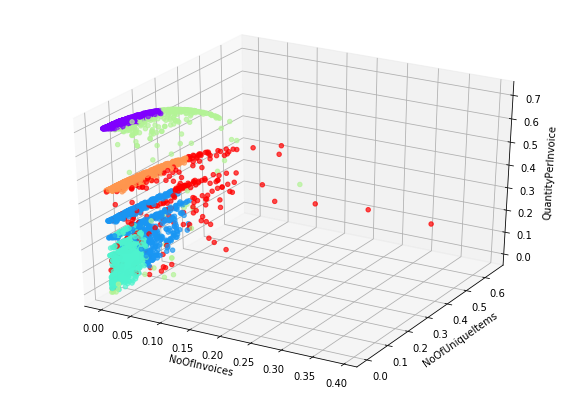

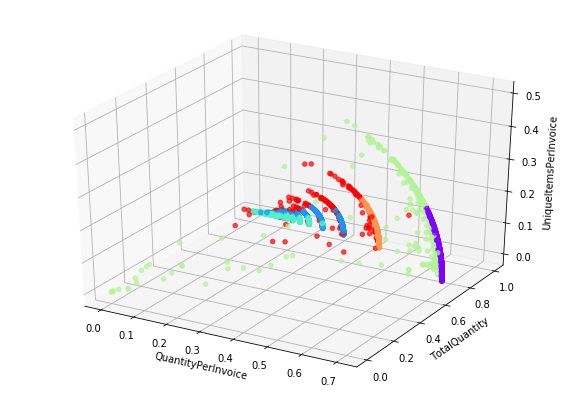

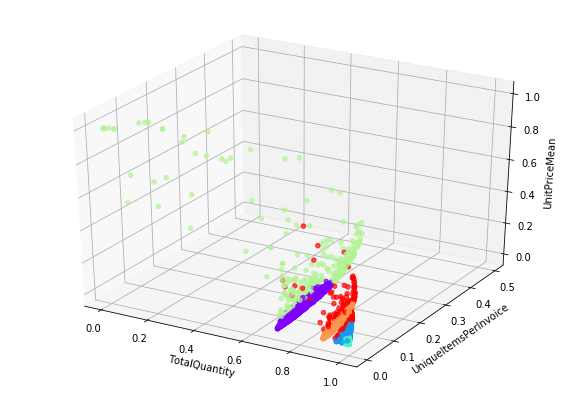

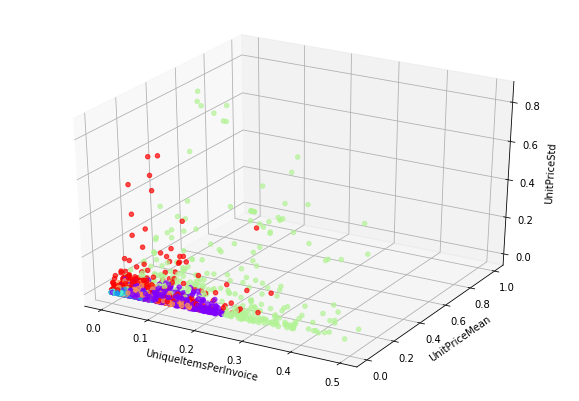

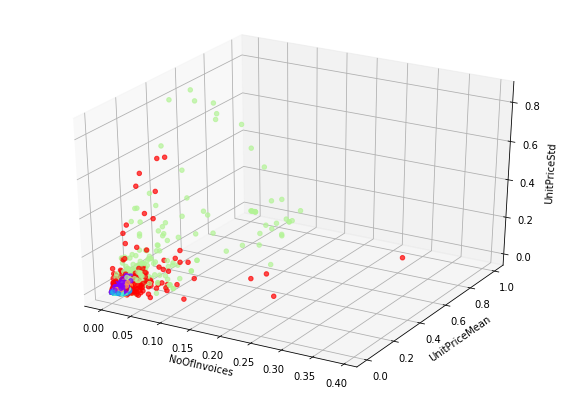

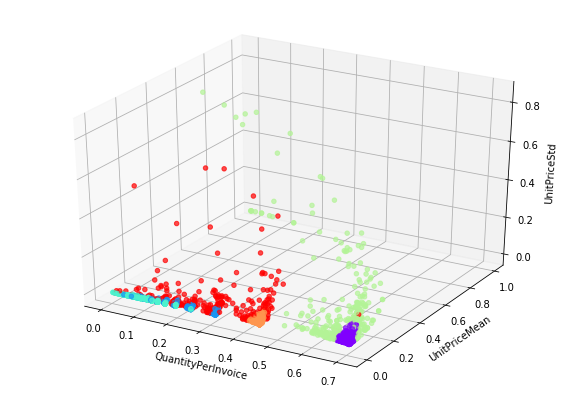

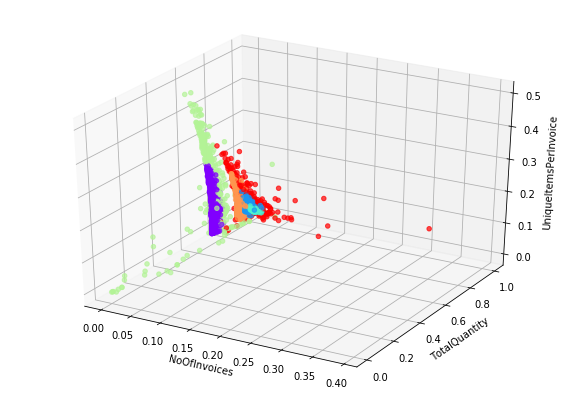

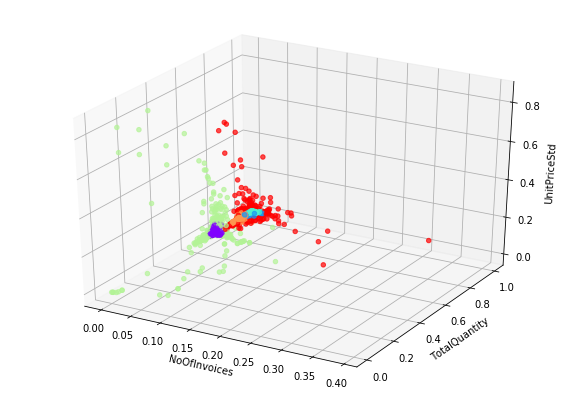

In [79]:
from sklearn.mixture import GaussianMixture
def do_gmm(X):
    gmm = GaussianMixture(n_components=6, covariance_type='full', tol=0.001, reg_covar=1e-06, \
                          max_iter=100, n_init=1, init_params='kmeans', weights_init=None, \
                          means_init=None, precisions_init=None, random_state=None, warm_start=False, \
                          verbose=0, verbose_interval=10)
    gmm.fit(X)
    something = gmm.predict(X)
    make_figure(X,something,axii=[0,1,2])
    make_figure(X,something,axii=[2,3,4])
    make_figure(X,something,axii=[3,4,5])
    make_figure(X,something,axii=[4,5,6])
    make_figure(X,something,axii=[0,5,6])
    make_figure(X,something,axii=[2,5,6])
    make_figure(X,something,axii=[0,3,4])
    make_figure(X,something,axii=[0,3,6])
    return gmm
    
gmm = do_gmm(X)

### Outliers 

1. Do outliers influence the results of your Hierarchical Clustering, K-means and GMM models?  
2. Do the outliers themselves form clusters? 

       NoOfInvoices  NoOfUniqueItems  QuantityPerInvoice  TotalQuantity  \
count   4338.000000      4338.000000         4338.000000    4338.000000   
mean       4.272015        61.501153          252.462892    1187.644537   
std        7.697998        85.366768         1312.769337    5043.619654   
min        1.000000         1.000000            1.000000       1.000000   
25%        1.000000        16.000000           92.000000     159.000000   
50%        2.000000        35.000000          161.000000     378.000000   
75%        5.000000        77.000000          270.000000     989.750000   
max      209.000000      1787.000000        74215.000000  196915.000000   

       UniqueItemsPerInvoice  UnitPriceMean  UnitPriceStd  
count            4338.000000    4338.000000   4338.000000  
mean               18.693001       4.470820      4.328742  
std                17.166093      34.215024     18.785884  
min                 0.200000       0.122500      0.000000  
25%                 8.00

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

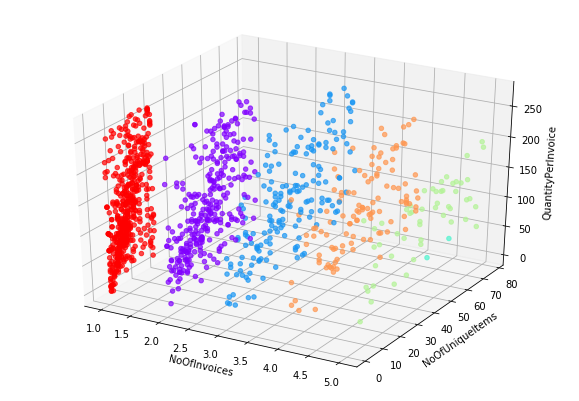

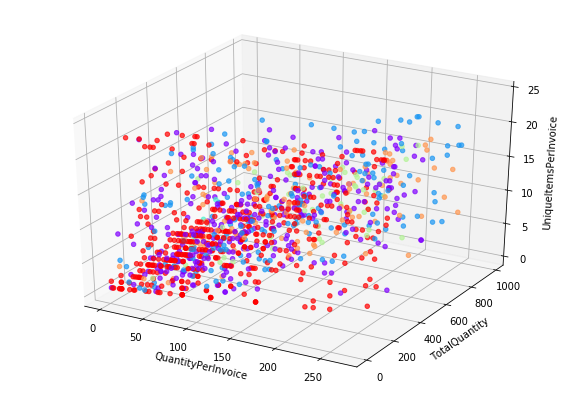

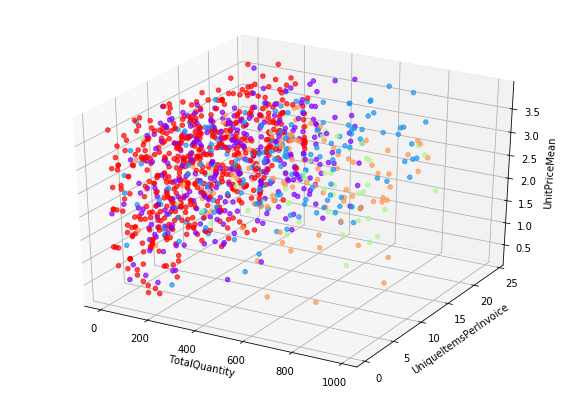

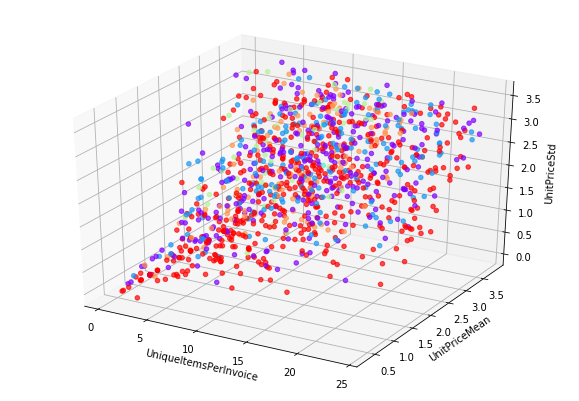

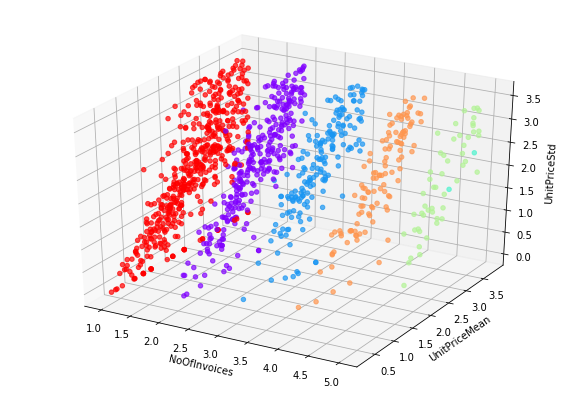

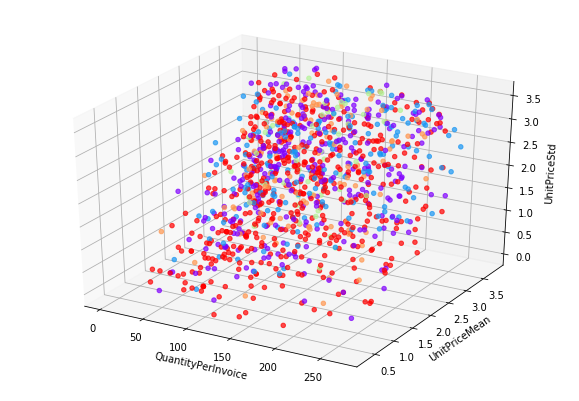

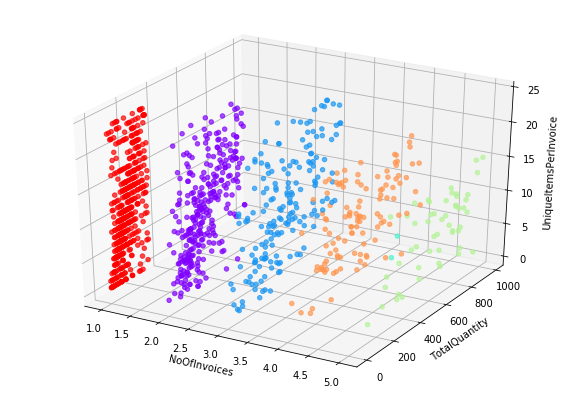

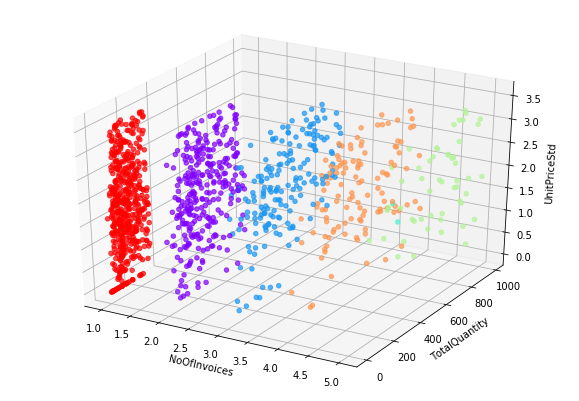

In [92]:
print(df_clus.describe())
df_inlier = df_clus[(df_clus['NoOfInvoices']<=5)&(df_clus['NoOfUniqueItems']<=77)&(df_clus['QuantityPerInvoice']<=270)& \
                   (df_clus['TotalQuantity']<=989.75)&(df_clus['UniqueItemsPerInvoice']<=24) & \
                   (df_clus['UnitPriceMean']<=3.8325) & (df_clus['UnitPriceStd']<=3.55)]
print(len(df_inlier))

do_gmm((df_inlier.values))

In [ ]:
plt.hist(normalize([df_inlier['TotalQuantity']]))

### Validating clusters  

1. Use at least three techniques to validate that your chosen clusters correspond to meaningful customer segments. You may consider a combination of using visualisations and/or quantitative metrics (refer to Elements of Statistical Learning for some examples)

### Model selection

1. Explain when it is appropriate to use K-Means, GMM and Hierarchical Clustering 
2. Which model would you choose for this dataset? 

### Opening the black box of clustering [reference pg 503](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

1. In your own words, explain the broad idea behind building a proximity matrix to cluster data. (This should also be verbally presented during Monday's presentation). 
*Sometimes, typing values into MS Excel helps with building intuition

2. In your own words, how would you calculate the disimilarity between objects in a dataset? (This should also be verbally presented during Monday's presentation)

### PCA for Dimensionality Reduction 

1. Using the dataset that you have pre-processed, construct a pairplot again. How is it different from the a plot of the raw data and what is your interpretation?  
2. Apply PCA pre-processed dataset. More information on PCA here [link]
3. Create a plot of cumulative explained variance and number of components. How does this inform you about the best number of components to select? 
4. Create a plot of PC0 against PC1, coloured by the GMM's predictions on the normalised dataset with outliers removed for n_components =7
5. How would you connect the Princip